In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime as dt
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
humidity=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/humidity.csv")
humidity['datetime'] = pd.to_datetime(humidity['datetime'])
humidity['date'] = humidity['datetime'].dt.date
#humidity.head()
chi_humidity=humidity.loc[:,["date","Chicago"]]
chi_humidity.head()

,date,Chicago
0,2012-10-01,NaN
1,2012-10-01,71.0
2,2012-10-01,70.0
3,2012-10-01,70.0
4,2012-10-01,70.0


In [3]:
chi_humidity.isnull().sum()

date          0
Chicago    1109
dtype: int64

In [4]:
temperature=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/temperature.csv")
temperature['datetime'] = pd.to_datetime(temperature['datetime'])
temperature['date'] = temperature['datetime'].dt.date
temperature.head()
chi_temp=temperature.loc[:,["date","Chicago"]]
chi_temp.head()

,date,Chicago
0,2012-10-01,NaN
1,2012-10-01,284.010000
2,2012-10-01,284.054691
3,2012-10-01,284.177412
4,2012-10-01,284.300133


In [5]:
chi_crime=pd.read_csv("/Users/rudranibhadra/Downloads/Chicago_Crimes_2012_to_2017.csv")
chi_crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [6]:
chi_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [7]:
chi_crime['Date'] = pd.to_datetime(chi_crime['Date'])

In [8]:
chi_crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [9]:
chi_crime['date'] = [d.date() for d in chi_crime['Date']] 

In [10]:
chi_crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",2016-05-03
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",2016-05-03
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",2016-05-03
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",2016-05-03
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",2016-05-03


In [11]:
chi_temp=chi_temp.groupby(['date'])['Chicago'].mean().reset_index()

In [12]:
chi_temp.head()

,date,Chicago
0,2012-10-01,284.552669
1,2012-10-02,287.713511
2,2012-10-03,289.127917
3,2012-10-04,290.032500
4,2012-10-05,291.207500


In [13]:
df1 = chi_crime.groupby(chi_crime['date']).size().reset_index(name='No of crimes')

In [14]:
df1.head()

,date,No of crimes
0,2012-01-01,1451
1,2012-01-02,700
2,2012-01-03,805
3,2012-01-04,799
4,2012-01-05,871


In [15]:
data=pd.merge(chi_temp,df1, on='date')

In [16]:
data.head()

,date,Chicago,No of crimes
0,2012-10-01,284.552669,1046
1,2012-10-02,287.713511,905
2,2012-10-03,289.127917,919
3,2012-10-04,290.032500,879
4,2012-10-05,291.207500,914


In [17]:
data.rename(columns={'Chicago': 'Avg Temperature'}, inplace=True)

In [18]:
data.isnull().sum()

date               0
Avg Temperature    0
No of crimes       0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1570
Data columns (total 3 columns):
date               1571 non-null object
Avg Temperature    1571 non-null float64
No of crimes       1571 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 49.1+ KB


In [20]:
# plt.scatter(data['Avg Temperature'],data['No of crimes'],color='b',alpha=0.2,s=1)
# plt.xlabel('Avg Temperature')
# plt.ylabel('No of crimes')
# plt.show()

In [21]:
pressure=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/pressure.csv")
pressure['datetime'] = pd.to_datetime(pressure['datetime'])
pressure['date'] = pressure['datetime'].dt.date
#pressure.head()
chi_pressure=pressure.loc[:,["date","Chicago"]]
chi_pressure.head()

,date,Chicago
0,2012-10-01,NaN
1,2012-10-01,1014.0
2,2012-10-01,1014.0
3,2012-10-01,1014.0
4,2012-10-01,1014.0


In [22]:
humidity=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/humidity.csv")
humidity['datetime'] = pd.to_datetime(humidity['datetime'])
humidity['date'] = humidity['datetime'].dt.date
#humidity.head()
chi_humidity=humidity.loc[:,["date","Chicago"]]
chi_humidity.head()

,date,Chicago
0,2012-10-01,NaN
1,2012-10-01,71.0
2,2012-10-01,70.0
3,2012-10-01,70.0
4,2012-10-01,70.0


In [23]:
weather_description=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/weather_description.csv")
weather_description.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [24]:
chi_humidity['Chicago'] = chi_humidity['Chicago'].fillna(chi_humidity.groupby('date')['Chicago'].transform('mean'))
chi_pressure['Chicago'] = chi_pressure['Chicago'].fillna(chi_pressure.groupby('date')['Chicago'].transform('mean'))

In [46]:
data1=pd.merge(chi_humidity,data, on='date')

In [47]:
data1.head()

,date,Chicago,Avg Temperature,No of crimes
0,2012-10-01,68.909091,284.552669,1046
1,2012-10-01,71.000000,284.552669,1046
2,2012-10-01,70.000000,284.552669,1046
3,2012-10-01,70.000000,284.552669,1046
4,2012-10-01,70.000000,284.552669,1046


In [48]:
data1.rename(columns={'Chicago': 'Avg Humidity'}, inplace=True)

In [49]:
data2=pd.merge(chi_pressure,data1, on='date')

In [50]:
data2.head()

,date,Chicago,Avg Humidity,Avg Temperature,No of crimes
0,2012-10-01,1014.0,68.909091,284.552669,1046
1,2012-10-01,1014.0,71.000000,284.552669,1046
2,2012-10-01,1014.0,70.000000,284.552669,1046
3,2012-10-01,1014.0,70.000000,284.552669,1046
4,2012-10-01,1014.0,70.000000,284.552669,1046


In [51]:
data2.rename(columns={'Chicago': 'Avg Pressure'}, inplace=True)

In [52]:
weather_description=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/weather_description.csv")
weather_description.head()
weather_description['datetime'] = pd.to_datetime(weather_description['datetime'])
weather_description['date'] = weather_description['datetime'].dt.date
#humidity.head()
chi_rain=weather_description.loc[:,["date","Chicago"]]
chi_rain.head()

,date,Chicago
0,2012-10-01,NaN
1,2012-10-01,overcast clouds
2,2012-10-01,overcast clouds
3,2012-10-01,overcast clouds
4,2012-10-01,overcast clouds


In [53]:
chi_rain.isnull().sum()

date       0
Chicago    1
dtype: int64

In [54]:
chi_rain = chi_rain.dropna(subset=['Chicago'])

In [55]:
chi_rain=chi_rain.groupby('date')['Chicago'].agg(lambda x: x.value_counts().index[0]).to_frame().reset_index()

In [56]:
chi_rain.head()

,date,Chicago
0,2012-10-01,overcast clouds
1,2012-10-02,overcast clouds
2,2012-10-03,overcast clouds
3,2012-10-04,mist
4,2012-10-05,sky is clear


In [57]:
data3=pd.merge(data2,chi_rain,on='date')

In [58]:
data3.head()

,date,Avg Pressure,Avg Humidity,Avg Temperature,No of crimes,Chicago
0,2012-10-01,1014.0,68.909091,284.552669,1046,overcast clouds
1,2012-10-01,1014.0,71.000000,284.552669,1046,overcast clouds
2,2012-10-01,1014.0,70.000000,284.552669,1046,overcast clouds
3,2012-10-01,1014.0,70.000000,284.552669,1046,overcast clouds
4,2012-10-01,1014.0,70.000000,284.552669,1046,overcast clouds


In [59]:
data3.rename(columns={'Chicago': 'weather description'}, inplace=True)

In [60]:
data3=data3[['date','Avg Temperature','Avg Humidity','Avg Pressure','weather description','No of crimes']]

In [61]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903312 entries, 0 to 903311
Data columns (total 6 columns):
date                   903312 non-null object
Avg Temperature        903312 non-null float64
Avg Humidity           903312 non-null float64
Avg Pressure           903312 non-null float64
weather description    903312 non-null object
No of crimes           903312 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 48.2+ MB


In [62]:
data3.isnull().sum()

date                   0
Avg Temperature        0
Avg Humidity           0
Avg Pressure           0
weather description    0
No of crimes           0
dtype: int64

In [42]:
chi_humidity.isnull().sum()

date        0
Chicago    48
dtype: int64

In [43]:
chi_pressure.isnull().sum()

date        0
Chicago    24
dtype: int64

In [10]:
chi_humidity

,date,Chicago
0,2012-10-01,68.909091
1,2012-10-01,71.000000
2,2012-10-01,70.000000
3,2012-10-01,70.000000
4,2012-10-01,70.000000
5,2012-10-01,69.000000
6,2012-10-01,69.000000
7,2012-10-01,69.000000
8,2012-10-01,68.000000
9,2012-10-01,68.000000


In [44]:
chi_humidity =chi_humidity.dropna(subset=['Chicago'])
chi_pressure =chi_pressure.dropna(subset=['Chicago'])

In [45]:
chi_pressure.isnull().sum()

date       0
Chicago    0
dtype: int64

In [67]:
def f(x):
    x = x-273.15
    return float(x)

data3['Avg Temperature']=data3['Avg Temperature'].apply(f)

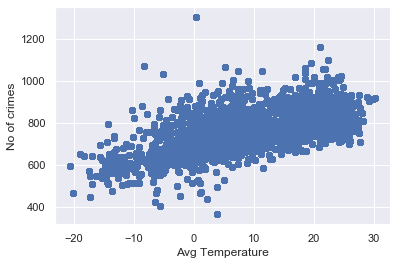

In [76]:
sns.set(color_codes=True)
plt.scatter(data3['Avg Temperature'],data3['No of crimes'],color='b',alpha=0.01)
plt.xlabel('Avg Temperature')
plt.ylabel('No of crimes')
plt.show()

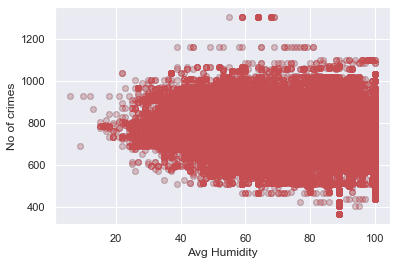

In [77]:
plt.scatter(data3['Avg Humidity'],data3['No of crimes'],color='r',alpha=0.01)
plt.xlabel('Avg Humidity')
plt.ylabel('No of crimes')
plt.show()

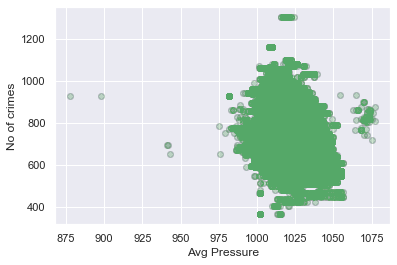

In [75]:
plt.scatter(data3['Avg Pressure'],data3['No of crimes'],color='g',alpha=0.01)
plt.xlabel('Avg Pressure')
plt.ylabel('No of crimes')
plt.show()

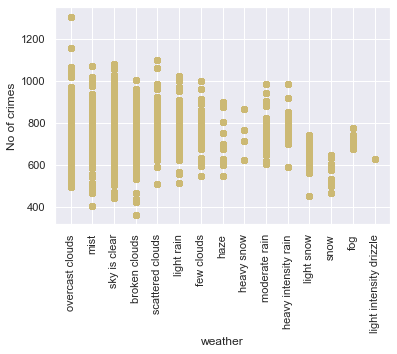

In [78]:
plt.scatter(data3['weather description'],data3['No of crimes'],color='y',alpha=0.01)
plt.xlabel('weather')
plt.ylabel('No of crimes')
plt.xticks(rotation=90)
plt.show()

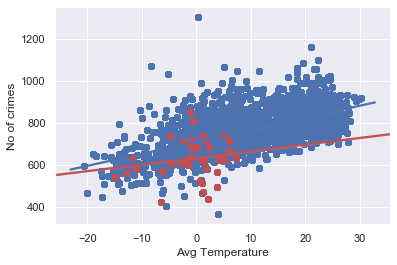

In [79]:
data3['date'] = pd.to_datetime(data3['date'])
ch = data3[(data3['date'].dt.month == 12) & (data3['date'].dt.day.isin([24,25,26,27,28,29,30,31]))]
sns.set(color_codes=True)
sns.regplot(data3['Avg Temperature'], data3['No of crimes'], color='b')
sns.regplot(ch['Avg Temperature'],ch['No of crimes'],color='r')

In [62]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903312 entries, 0 to 903311
Data columns (total 6 columns):
date                   903312 non-null object
Avg Temperature        903312 non-null float64
Avg Humidity           903312 non-null float64
Avg Pressure           903312 non-null float64
weather description    903312 non-null object
No of crimes           903312 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 48.2+ MB


In [63]:
data3['date'] = pd.to_datetime(data3['date'])

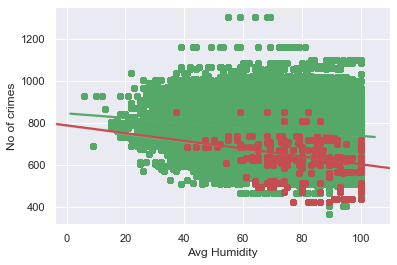

In [80]:
sns.set(color_codes=True)
sns.regplot(data3['Avg Humidity'], data3['No of crimes'], color='g')
sns.regplot(ch['Avg Humidity'],ch['No of crimes'],color='r')

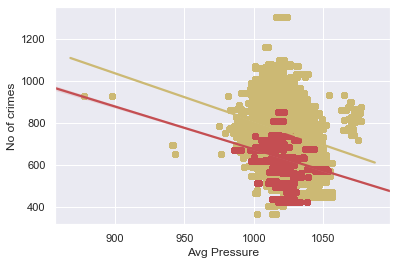

In [67]:
sns.set(color_codes=True)
sns.regplot(data3['Avg Pressure'], data3['No of crimes'], color='y')
sns.regplot(ch['Avg Pressure'],ch['No of crimes'],color='r')

In [81]:
#x_test = x_test.drop(['date'], axis=1)
#x_train = x_train.drop(['date'], axis=1)
from sklearn.model_selection import train_test_split
#data3.head()
from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
X=pd.DataFrame(data3[['Avg Temperature','Avg Humidity','Avg Pressure']])
#x_scaled = min_max_scaler.fit_transform(X)
#x_new = pd.DataFrame(x_scaled)
y=pd.DataFrame(data3.iloc[:,5])
#x_new.head()
#plt.plot(x_new)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
X_train.head()
# data3.info()
X_train1=pd.DataFrame(X_train['Avg Temperature'])
X_test1=pd.DataFrame(X_test['Avg Temperature'])
X_train2=pd.DataFrame(X_train['Avg Humidity'])
X_test2=pd.DataFrame(X_test['Avg Humidity'])
X_train3=pd.DataFrame(X_train['Avg Pressure'])
X_test3=pd.DataFrame(X_test['Avg Pressure'])

[708.8620319]
[[5.73517507]]


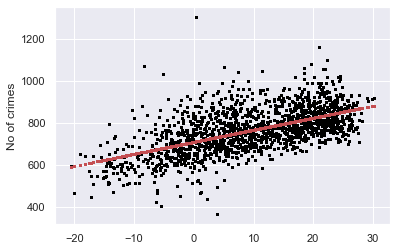

In [97]:
lr=LinearRegression()

lr.fit(X_train1, y_train)
prediction=lr.predict(np.sort(X_train1, axis=0))

y_pred = lr.predict(X_test1)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test1, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test1, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()


[843.9715377]
[[-1.07229148]]


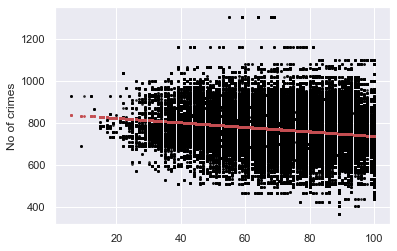

In [96]:
lr=LinearRegression()

lr.fit(X_train2, y_train)
prediction=lr.predict(np.sort(X_train2, axis=0))

y_pred = lr.predict(X_test2)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test2, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test2, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()

[3080.45946286]
[[-2.27242849]]


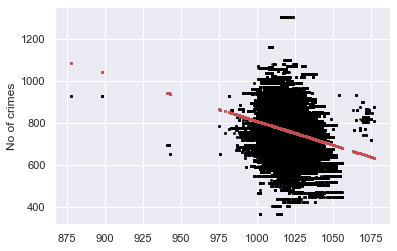

In [95]:
lr=LinearRegression()

lr.fit(X_train3, y_train)
prediction=lr.predict(np.sort(X_train3, axis=0))

y_pred = lr.predict(X_test3)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test3, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test3, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()

In [85]:
lr=LinearRegression()

lr.fit(X_train, y_train)
prediction=lr.predict(np.sort(X_train, axis=0))

y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)

[1099.41391144]
[[ 5.49530484 -0.60598647 -0.33630301]]


In [88]:
X_new = pd.DataFrame({'Avg Temperature': [-10],'Avg Humidity':[80],'Avg Pressure':[1000]})
lr.predict(X_new)

array([[659.67893925]])

In [89]:
#avg no of crimes in summer and winter months
#summer
sm = data3[(data3['date'].dt.month == 5) | (data3['date'].dt.month == 6) | (data3['date'].dt.month == 7) | (data3['date'].dt.month == 8)]
#winter
wn = data3[(data3['date'].dt.month == 11) | (data3['date'].dt.month == 12) | (data3['date'].dt.month == 1) | (data3['date'].dt.month == 2)]


The average number of incidents in the winter months in Chicago is: 700.1323792486584


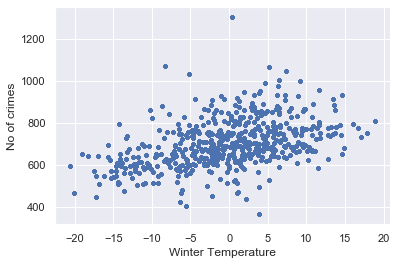

In [98]:
plt.scatter(wn['Avg Temperature'], wn['No of crimes'], color='b',alpha=0.5,s=5)
plt.xlabel('Winter Temperature')
plt.ylabel('No of crimes')
print("The average number of incidents in the winter months in Chicago is:", np.mean(wn['No of crimes']))

The average number of incidents in the summer months in Chicago is: 826.4562118126273


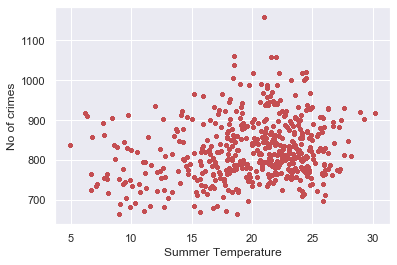

In [99]:
plt.scatter(sm['Avg Temperature'], sm['No of crimes'], color='r',alpha=0.5,s=5)
plt.xlabel('Summer Temperature')
plt.ylabel('No of crimes')
print("The average number of incidents in the summer months in Chicago is:", np.mean(sm['No of crimes']))